In [3]:
import tensorflow as tf
# 已经提供了现成的模块，可以用于下载并读取MNIST数据
import tensorflow.examples.tutorials.mnist.input_data as input_data

In [4]:
# 第一次执行input_data.read_data_sets()方法，如果没有数据，程序会自动下载
# 出现WARNING的话不用管它，一些TensorFlow版本的问题
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
# 查看MNIST数据 训练数据55000项目，验证数据5000项，测试数据10000项
print('train',mnist.train.num_examples,
         ',validation',mnist.validation.num_examples,
         ',test',mnist.test.num_examples)

train 55000 ,validation 5000 ,test 10000


In [7]:
print('train_images : ',mnist.train.images.shape,
         ' - labels : ',mnist.train.labels.shape)


train_images :  (55000, 784)  - labels :  (55000, 10)


In [8]:
# 查看第0项images图像的长度
len(mnist.train.images[0])

784

In [9]:
# 查看第0项images图像的内容
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
# 定义plot_image()显示图像
import matplotlib.pyplot as plt
def plot_image(image):
    plt.imshow(image.reshape(28,28),cmap='binary')
    plt.show()

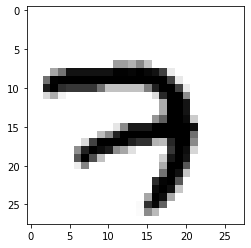

In [11]:
plot_image(mnist.train.images[0])

In [12]:
# 查看labels数据
# 由于我们之前下来数据时设置了One_Hot=True
# 所以输出的数据都是由10个0和1组成数组
# 使用one-hot的原因是，后续我们所建立类神经网络输出层总共有10个神经元
# 10个输出神经元分别对应0~9的数字
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [13]:
# 使用one-hot格式阅读起来不方便，我们使用np。argmax进行转换
import numpy as np
np.argmax(mnist.train.labels[0])

7

In [14]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)

        ax.imshow(np.reshape(images[idx],(28, 28)), 
                  cmap='binary')

        title= "label=" +str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 

        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

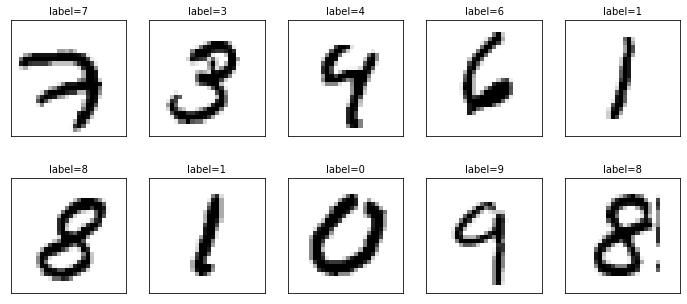

In [15]:
# 查看前十项数据
plot_images_labels_prediction(mnist.train.images,mnist.train.labels,[],0)

In [16]:
# 查看vaildation数据项
print('validation images:', mnist.validation.images.shape,
      'labels:'           , mnist.validation.labels.shape)

validation images: (5000, 784) labels: (5000, 10)


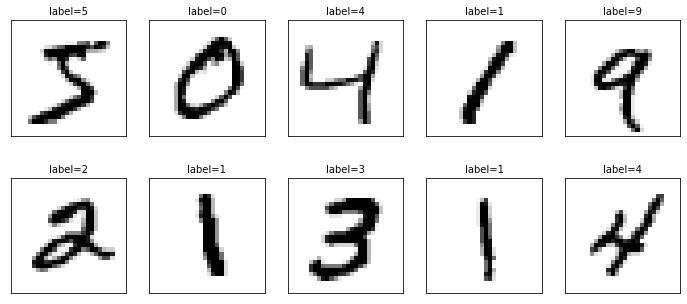

In [17]:
plot_images_labels_prediction(mnist.validation.images,
                              mnist.validation.labels,[],0)

In [18]:
# 查看test数据集
print('test images:', mnist.test.images.shape,
      'labels:'           , mnist.test.labels.shape)

test images: (10000, 784) labels: (10000, 10)


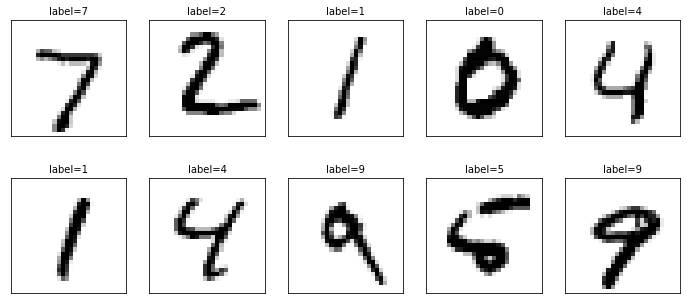

In [19]:
plot_images_labels_prediction(mnist.test.images,
                              mnist.test.labels,[],0)

In [20]:
batch_images_xs, batch_labels_ys = mnist.train.next_batch(batch_size=100)
print(len(batch_images_xs),
      len(batch_labels_ys))

100 100


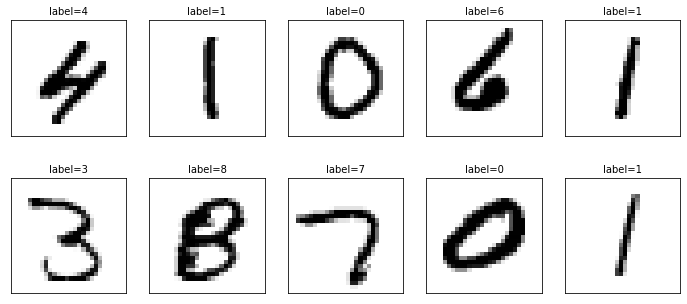

In [21]:
# 显示批次数据
plot_images_labels_prediction(batch_images_xs,
                              batch_labels_ys,[],0)

In [22]:
# 定义layer函数，建立2层网络
# 以正态分布的随机数建立并初始化W（权重）
# 以正态分布的随机数建立b(偏差)
def layer(output_dim,input_dim,inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [23]:
# 建立输入层，使用placeholder方法建立输入层
# 输入数据类型为Float，即浮点数
# 第一维设置None，因为后续训练传入图像项数不确定
# 第二维维784，输入数字图像是784像素
X = tf.placeholder("float",[None,784])

In [24]:
# 建立隐藏层
# 隐藏层神经元个数为226
# 输入层的神经元个数，也就是X=784
# 输入层 = X 连接输入层
# 定义激活函数为ReLU
h1 = layer(output_dim=256,input_dim=784,inputs=X,activation=tf.nn.relu)

In [25]:
# 建立输出层
# 建立输出层神经元个数为10
# 输入神经元个数为隐藏层的个数 h1 = 256
# 连接隐藏层
# 没有激活函数
y_predict = layer(output_dim=10,input_dim=256,inputs=h1,activation=None)

In [26]:
# 建立训练数据label真实值的placeholder
# 第二位设置为10，因为输入数字真实值已经是使用one-hot转换的值,0~9
y_label = tf.placeholder("float",[None,10])

In [27]:
# 定义损失函数
# 使用cross_entropy()交叉熵的训练效果比较好
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_predict,labels=y_label))

In [28]:
# 首先计算每一项数据是否预测正确
# 将运算结果存储在correct_prdiction中
# tf.equal判断真实值与测试值是否相等
# argmax将one-hot encoding转成数字0~9
correct_prdiction = tf.equal(tf.argmax(y_label,1),
                                        tf.argmax(y_predict,1))

In [29]:
# 计算预测正确结果的平均值
# 将tf.cast转换成float，在使用reduce_mean转成所有数平均值
accuracy = tf.reduce_mean(tf.cast(correct_prdiction,"float"))

In [30]:
# 定义训练参数
# 执行15个训练周期
# 每一批次项数为100
# loss、epoch、accuracy三个列表分别记录误差、训练周期、准确率
# time导入时间模块
trainEpochs = 15
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize)
loss_list = [] ;epoch_list = [];accuracy_list = []
from time import time
startTime = time()

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [37]:
# 进行迭代训练
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={X: batch_x,y_label: batch_y})

    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={X: mnist.validation.images, 
                                   y_label: mnist.validation.labels})

    epoch_list.append(epoch);loss_list.append(loss)
    accuracy_list.append(acc)    
    print("Train Epoch:", '%02d' % (epoch+1), "Loss=", \
                "{:.9f}".format(loss)," Accuracy=",acc)

duration =time()-startTime
print("Train Finished takes:",duration)

NameError: name 'optimizer' is not defined

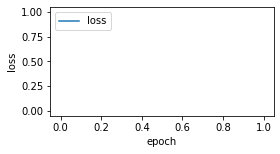

In [31]:
# 画图误差执行结果图
# 设置matplotlib在jupyter note页面显示图像
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

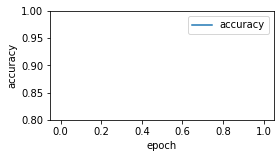

In [32]:
# 画出准确率
plt.plot(epoch_list, accuracy_list,label="accuracy" )
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
print("Accuracy:", sess.run(accuracy,feed_dict={X: mnist.test.images,y_label: mnist.test.labels}))

In [ ]:
prediction_result=sess.run(tf.argmax(y_predict,1),
                           feed_dict={X: mnist.test.images })

In [ ]:
# 显示预测结果，前10项
prediction_result[:10]

In [ ]:
# 画图结果的图片
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)

        ax.imshow(np.reshape(images[idx],(28, 28)), 
                  cmap='binary')

        title= "label=" +str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 

        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

In [ ]:
plot_images_labels_prediction(mnist.test.images,
                              mnist.test.labels,
                              prediction_result,0)